## DATA CLEANING


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [93]:
import matplotlib.pyplot as plt
plt.style.use("default")

In [94]:
import warnings
warnings.filterwarnings("ignore")


In [95]:
sales=pd.read_csv("data/sales.csv")
sales.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


# **This dataset contains sales transaction records including order date, region, product category, sales, and profit. The goal of this analysis is to understand sales performance and identify trends and improvement opportunities.**


In [96]:
sales.shape

(12575, 11)

In [97]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [137]:
sales.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date,Year,Month
count,12575.000000,12575.000000,12575.000000,12575,12575.000000,12575.000000
mean,22.234314,5.270457,123.425129,2023-07-12 20:23:41.105368064,2023.042386,6.366441
min,0.000000,0.000000,0.000000,2022-01-01 00:00:00,2022.000000,1.000000
25%,12.500000,3.000000,43.500000,2022-09-30 00:00:00,2022.000000,3.000000
50%,23.000000,5.000000,100.000000,2023-07-13 00:00:00,2023.000000,6.000000
75%,32.000000,8.000000,184.000000,2024-04-24 00:00:00,2024.000000,9.000000
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00,2025.000000,12.000000
std,11.618742,3.029325,96.514921,NaN,0.855581,3.503156


In [98]:
sales.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [99]:
sales.drop_duplicates(inplace=True)

In [100]:
sales["Transaction Date"]=pd.to_datetime(sales["Transaction Date"])

In [101]:
sales["Transaction Date"].dtype

dtype('<M8[ns]')

In [138]:
sales.fillna("00000",inplace=True) 

In [103]:
sales.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

### **Data cleaning was performed to ensure accuracy and consistency by handling missing values, removing duplicate records,converting date columns into proper datetime format and replace the zero values in null cells.**

In [104]:
sales.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,00000
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## FEATURE PREPARATION

In [105]:
sales["Year"]=sales["Transaction Date"].dt.year

In [106]:
sales["Month"]=sales["Transaction Date"].dt.month

In [107]:
sales.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,4
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,7
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,10
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,00000,2022,5
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,10


In [108]:
sales["Quantity"]=pd.to_numeric(sales["Quantity"])

In [109]:
sales["Total Spent"]=pd.to_numeric(sales["Total Spent"])

In [126]:
sales["Price Per Unit"]=pd.to_numeric(sales["Price Per Unit"])

## MONTHLY SALES TREND

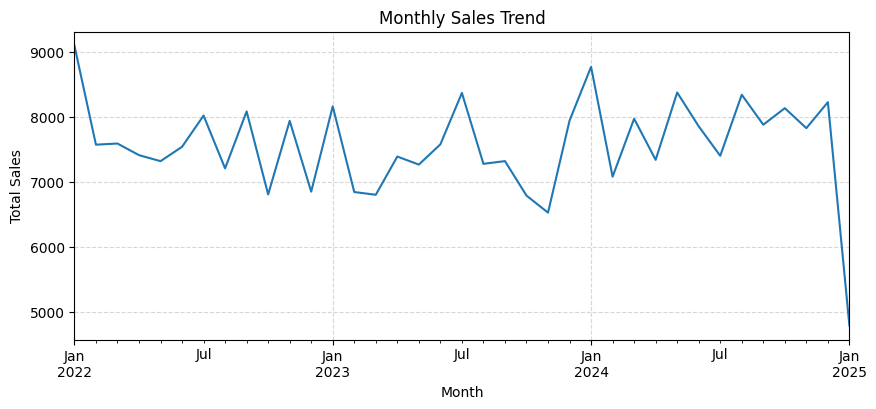

In [151]:
monthly_sales=sales.groupby(sales["Transaction Date"].dt.to_period("M"))["Price Per Unit"].sum()
monthly_sales.plot(kind="line",figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--",alpha=0.5)
plt.show()

### **Sales shows clear fluctuations across months, indicating possible seasonal patterns that can be leveraged for targeted promotions.**

## SALES BY REGION

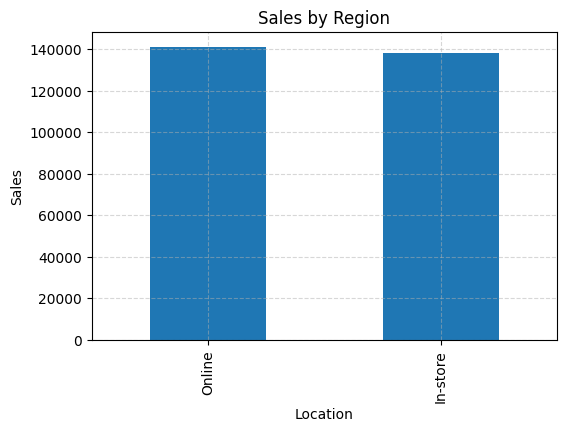

In [152]:
region_sales=sales.groupby("Location")["Price Per Unit"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar",figsize=(6,4))
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

### **The highest revenue is generated from specific regions, suggesting where marketing and inventory investments should be prioritized.**

## TOP PRODUCT CATEGORIES

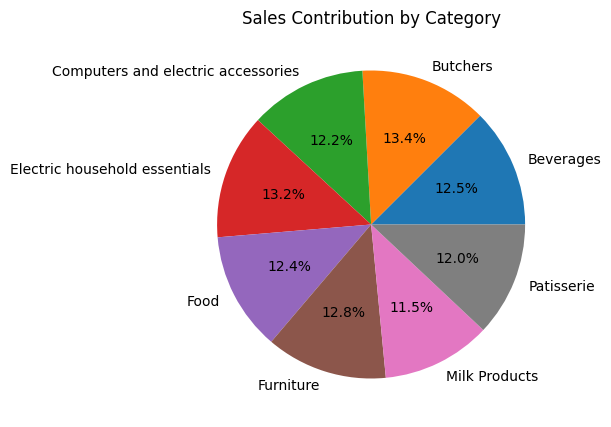

In [129]:
category_sales=sales.groupby("Category")["Price Per Unit"].sum()
category_sales.plot(kind="pie", autopct="%1.1f%%",figsize=(5,5))
plt.title("Sales Contribution by Category")
plt.ylabel(" ")
plt.show()

### **Certain product categories contribute significantly more to total sales, highlighting key revenue drivers.**

## PROFIT ANALYSIS

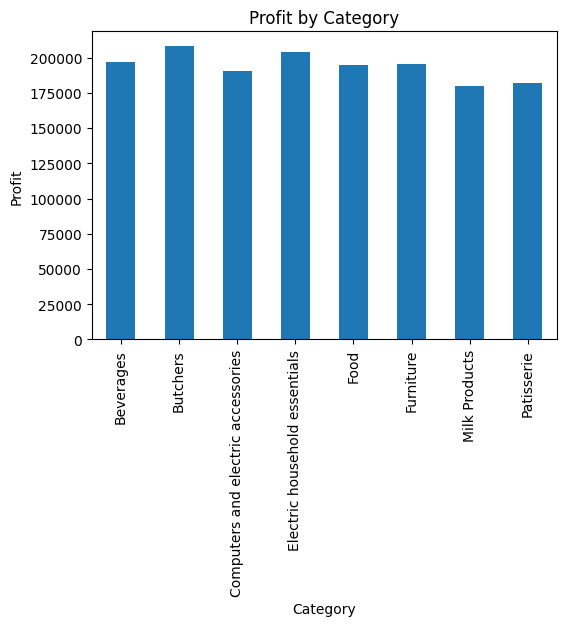

In [134]:
spent_by_category=sales.groupby("Category")["Total Spent"].sum()
spent_by_category.plot(kind="bar",figsize=(6,4))
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.show()

### **Not all high-sales categories generate equal profit, indicating potential pricing or cost optimization opportunities.**

## Business Insights & Recommendations
- Identified seasonal sales trends which can help in planning promotions
- High-performing regions can be prioritized for expansion
- Certain categories drive revenue but offer lower profit margins
- Data-driven decisions can improve sales strategy and profitability
